In [1]:
# NOTE: PLEASE MAKE SURE YOU ARE RUNNING THIS IN A PYTHON3 ENVIRONMENT

import tensorflow as tf
print(tf.__version__)


2.4.0


In [ ]:
# Double check TF 2.0x is installed. If you ran the above block, there was a 
# 'reset all runtimes' button at the bottom that you needed to press
import tensorflow as tf
print(tf.__version__)

In [3]:
# If the import fails, run this
# !pip install -q tensorflow-datasets
# 데이터셋 담겨있는 라이브러리 불러오기

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True) #subwords8k 데이터셋 받아오기


In [7]:
train_data, test_data = imdb['train'], imdb['test'] # 연습셋, 테스트셋 받아오기

In [9]:
tokenizer = info.features['text'].encoder # 토커나이저 생성

In [10]:
print(tokenizer.subwords) # 토큰화된 단어들 보여주기

, 'pee', 'nar', 'location_', 'ining_', 'gam', 'disappointing_', 'desire_', 'criminal_', 'considera', 'century_', 'celebrat', 'brow', 'area', 'Thin', 'Rec', "' (", 'ward_', 'vision_', 'treme', 'surprising_', 'super_', 'risk', 'receive', 'qual', 'pic', 'mee', 'levels', 'kins', 'jack', 'ire_', 'introduc', 'hits_', 'happening_', 'handsome', 'gradua', 'giv', 'garbage', 'forces_', 'finest_', 'easi', 'depressing', 'credits', 'asto', 'Sadly', 'Ple', 'Inc', 'Dick_', 'Alexand', 'wooden_', 'wood_', 'stro', 'steal_', 'soul_', 'reference', 'race', 'quis', 'pir', 'perv', 'obvious', 'majority_', 'lean', 'kes_', 'insti', 'identity', 'everybody_', 'double_', 'dies', 'credit', 'const', 'confe', 'compar', 'centur', 'bloody_', 'Under', 'Twi', 'Sean_', 'Lio', 'Halloween', 'Gal', 'Clu', 'Came', 'Barbara_', '?)', '11_', 'ws', 'ulous', 'subtle', 'substance', 'string', 'shocking_', 'scientist_', 'rian', 'nou', 'multi', 'lf', 'inal', 'harsh', 'handed', 'fir', 'expectations_', 'excited', 'exceptional', 'eva', 'c

In [12]:
# 원래 문장 -> 토큰화된 문장 
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))


Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [13]:
# 뭐가 어떻게 토큰으로 바꼈는지 보여줌
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [14]:
# 데이터셋 만들기(훈련, 검증에 사용할 것)
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [15]:
# 모델 생성
embedding_dim = 64 # 단어의 성격(방향)을 결정짓는 요소(벡터의 방향을 결정짓는 차원 개수)가 64개 -> 64차원 벡터
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [16]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) # 훈련 방법 설정

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset) # 훈련

Epoch 1/10
391/391 [==============================] - 10s 23ms/step - loss: 0.6914 - accuracy: 0.5110 - val_loss: 0.6546 - val_accuracy: 0.5631
Epoch 2/10
391/391 [==============================] - 9s 22ms/step - loss: 0.6107 - accuracy: 0.7238 - val_loss: 0.5082 - val_accuracy: 0.8224
Epoch 3/10
391/391 [==============================] - 9s 23ms/step - loss: 0.4671 - accuracy: 0.8544 - val_loss: 0.4204 - val_accuracy: 0.8706
Epoch 4/10
391/391 [==============================] - 9s 24ms/step - loss: 0.3743 - accuracy: 0.8922 - val_loss: 0.3840 - val_accuracy: 0.8661
Epoch 5/10
391/391 [==============================] - 10s 24ms/step - loss: 0.3135 - accuracy: 0.9102 - val_loss: 0.3434 - val_accuracy: 0.8782
Epoch 6/10
391/391 [==============================] - 10s 25ms/step - loss: 0.2738 - accuracy: 0.9213 - val_loss: 0.3304 - val_accuracy: 0.8795
Epoch 7/10
391/391 [==============================] - 10s 25ms/step - loss: 0.2430 - accuracy: 0.9280 - val_loss: 0.3227 - val_accuracy: 0.

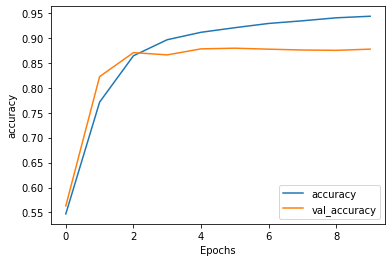

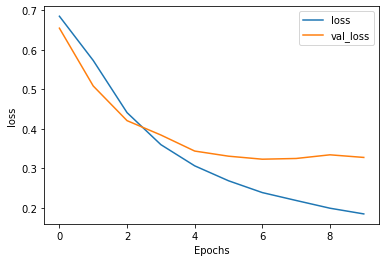

In [17]:
# 정확도, 손실 그래프 그려주가
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [18]:
# 결과값 저장 -> 추출한 뒤 결과값 그래프로 분석하는 사이트에서 분석
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(8185, 64)
